In [10]:
import numpy as np
from scipy import stats
import time
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
weight = np.array([42,  46,  53,  56,  58,  61,  62,  63,  65,  67,  73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

Text(0, 0.5, 'weight')

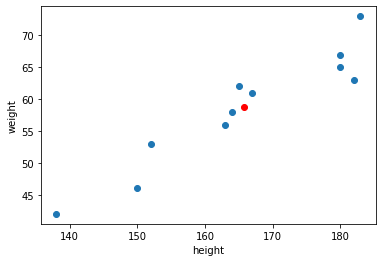

In [6]:
plt.scatter(height, weight)
plt.plot(np.mean(height), np.mean(weight), 'ro')
plt.xlabel('height')
plt.ylabel('weight')

Text(0, 0.5, 'weight')

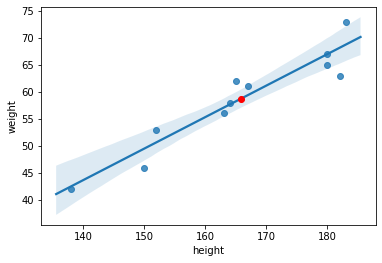

In [8]:
#線形回帰
sns.regplot(height, weight)
plt.plot(np.mean(height), np.mean(weight), 'ro')
plt.xlabel('height')
plt.ylabel('weight')

In [11]:
#説明変数は、shapeが(サンプル数,特徴量数)のndarrayにする
X = np.expand_dims(height, axis=-1)
#目的変数のshapeは(サンプル数)でOKなのでこのまま
y = weight

#インスタンス作成
reg = LinearRegression()
#.fit()関数で、そのモデルのアルゴリズムを与えられたデータで学習できる
reg.fit(X, y)

#回帰係数bと切片aは、以下のようにアクセス
#.coef_はndarrayで返ってくる。shapeはX.shape次第
print('b={}'.format(reg.coef_))
print('a={}'.format(reg.intercept_))

b=[0.58302859]
a=-37.94946808510638


In [12]:
#標準偏差
s_x = np.std(height)
s_y = np.std(weight)
#平均
mean_x = np.mean(height)
mean_y = np.mean(weight)
#相関係数
r = np.corrcoef(weight, height)[0][1]
b = r * s_y/s_x
a = mean_y -b*mean_x
print('b={}'.format(b))
print('a={}'.format(a))

b=0.5830285904255318
a=-37.94946808510635


Text(0, 0.5, 'weight')

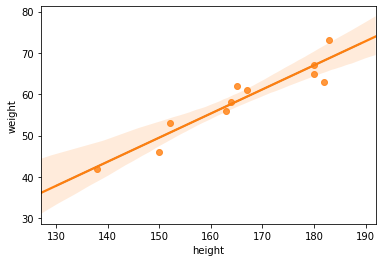

In [25]:
#x軸の作成
x = np.arange(130, 190, 1)
plt.plot(x, b*x+a, )
#seabornのregplotも合わせて描画,結果は一致
sns.regplot(height, weight)
plt.xlabel('height')
plt.ylabel('weight')

In [26]:
#学習した線形回帰モデルで予測
X = np.array([[175]])
y = reg.predict(X)
print(X, y)

[[175]] [64.08053524]


Text(0, 0.5, 'weight')

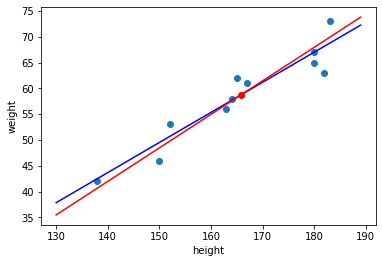

In [29]:
#xからyを予測する回帰直線の式を、yからxを予測する際には使えない

#reg1 heightからweightを予測する回帰直線
X = np.expand_dims(height, axis=-1)
y = weight
reg1 = LinearRegression()
reg1.fit(X, y)

#reg2 weightからheightを予測する回帰直線
X = np.expand_dims(weight, axis=-1)
y = height
reg2 = LinearRegression()
reg2.fit(X, y)

#直線を描画するためのx軸のリストを作成
x = np.arange(130, 190, 1)
#学習に使った値を描画
plt.scatter(height, weight)
#reg1を描画
plt.plot(x, x*reg1.coef_+reg1.intercept_, 'b')
#reg2を描画: x=a'+b'yを変形し、y=(x-a')/b'になっている
plt.plot(x, (x-reg2.intercept_)/reg2.coef_, 'r')
#reg1とreg2が交差している点がweightとheightの平均の点
plt.plot(np.mean(height), np.mean(weight), 'ro')
plt.xlabel('height')
plt.ylabel('weight')

In [30]:
#決定係数(R**2)：説明変数がどれだけ目的変数の値を説明しているかの指標
#R**2=0: xが全くyを説明できていない
#R**2=1: xが完全にyを説明している